# NLP Sentiment Analysis

### Objective

The objective of this exercise is to analyze the sentiment of restaurant reviews using Natural Language Processing (NLP) techniques. By the end of this exercise, you will understand how to preprocess text data, apply sentiment analysis tools, and interpret the results.

## Step 1: Import Libraries

First, we need to import the necessary libraries for data manipulation and NLP tasks.

In [1]:
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download()

nltk.download('stopwords')
nltk.download('vader_lexicon')

2024-07-18 00:51:18.077 Python[56868:368206] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ariffin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ariffin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Step 2: Load the Dataset

Load the dataset containing restaurant reviews. We assume the dataset is in a tab-separated values (TSV) file.

In [2]:
# Importing the dataset
restaurant_df = pd.read_csv('./restaurant_reviews.tsv', delimiter = '\t')
restaurant_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
# change reviews to small letter case
restaurant_df['Review'] = restaurant_df['Review'].str.lower()
restaurant_df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


## Step 3: Preprocess the Text Data

Text data needs to be preprocessed to make it suitable for analysis. One common preprocessing step is to convert all text to lowercase.

In [5]:
#clean any punctuation in reviews
def clean_text(text):
    # Özel karakterleri ve sayıları kaldır
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text

restaurant_df['Review'] = restaurant_df['Review'].apply(clean_text)
restaurant_df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


## Step 4: Remove Stopwords

Stopwords are common words (like "and", "the", "is") that do not carry significant meaning and can be removed from the text.

In [6]:
#remove stopwords such as “the”, “a”, “an”, or “in”
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

restaurant_df['Review'] = restaurant_df['Review'].apply(remove_stopwords)
restaurant_df.head()

,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


## Step 5: Remove Rare Words

Rare words that appear very infrequently can be removed to reduce noise in the data.

In [7]:
#remove rare words
dropping = pd.Series(' '.join(restaurant_df['Review']).split()).value_counts()[-250:]
restaurant_df['Review'] = restaurant_df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in dropping))
restaurant_df.head()    


,Review,Liked
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1


## Step 6: Text Tokenization

Tokenization is the process of splitting text into individual words or tokens.

In [8]:
#text tokenization
restaurant_df['Review'].apply(lambda x: TextBlob(x).words).head()

0                                  [wow, loved, place]
1                                        [crust, good]
2                              [tasty, texture, nasty]
3    [stopped, late, may, bank, holiday, rick, stev...
4                     [selection, menu, great, prices]
Name: Review, dtype: object

## Step 7: Show Most Used Words

Generate a word cloud to visualize the most frequently used words in the reviews.

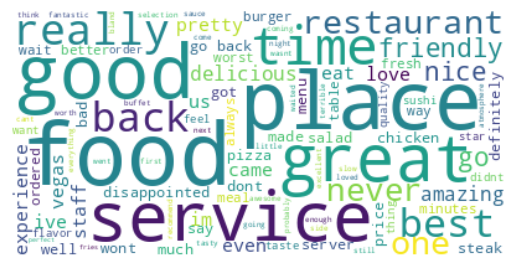

In [9]:
#Show most used words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# text değişkenini tanımla
text = " ".join(review for review in restaurant_df["Review"])

# WordCloud nesnesini oluştur
wordcloud = WordCloud(max_font_size=70,
                    max_words=100,
                    background_color="white").generate(text)

# WordCloud'u göster
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# WordCloud'u dosyaya kaydet
wordcloud.to_file("wordcloud.png")

## Step 8: Sentiment Analysis using SentimentIntensityAnalyzer
The SentimentIntensityAnalyzer is a popular tool for sentiment analysis that provides a simple interface for obtaining sentiment scores.

In [10]:
#sentiment analysis
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The food was awesome")

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

## Step 9: Sentiment Analysis of Reviews
Apply SentimentIntensityAnalyzer to the reviews in the dataset.

In [11]:
restaurant_df["Review"][0:20].apply(lambda x: sia.polarity_scores(x))

0     {'neg': 0.0, 'neu': 0.115, 'pos': 0.885, 'comp...
1     {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...
2     {'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...
3     {'neg': 0.131, 'neu': 0.414, 'pos': 0.455, 'co...
4     {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
5     {'neg': 0.645, 'neu': 0.215, 'pos': 0.14, 'com...
6     {'neg': 0.395, 'neu': 0.605, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
8     {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
9     {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'comp...
13    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
14    {'neg': 0.312, 'neu': 0.183, 'pos': 0.505, 'co...
15    {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'comp...
16    {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

## Step 10: Calculate Polarity Scores
Calculate the compound polarity score for each review and add it as a new column in the dataset.

In [12]:
restaurant_df["polarity_score"] = restaurant_df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
restaurant_df.head(20)

,Review,Liked,polarity_score
0,wow loved place,1,0.8271
1,crust good,0,0.4404
2,tasty texture nasty,0,-0.5574
3,stopped late may bank holiday rick steve recom...,1,0.6908
4,selection menu great prices,1,0.6249
5,getting angry want damn pho,0,-0.6908
6,honeslty didnt taste fresh,0,-0.2411
7,potatoes like rubber could tell made ahead tim...,0,0.5719
8,fries great,1,0.6249
9,great touch,1,0.6249


In [13]:
#polarity score, positive, negative and neutral were matched
restaurant_df["Review"][0:11].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else ("negative" if sia.polarity_scores(x)["compound"] < 0 else "neutral"))

0     positive
1     positive
2     negative
3     positive
4     positive
5     negative
6     negative
7     positive
8     positive
9     positive
10     neutral
Name: Review, dtype: object

## Step 11: Assign Sentiment Labels
Assign sentiment labels (positive, negative, neutral) based on the compound polarity score.

In [14]:
restaurant_df["sentiment_label"] = restaurant_df["Review"].apply(lambda x: "positive" if sia.polarity_scores(x)["compound"] > 0 else ("negative" if sia.polarity_scores(x)["compound"] < 0 else "neutral"))
restaurant_df.head(11)

,Review,Liked,polarity_score,sentiment_label
0,wow loved place,1,0.8271,positive
1,crust good,0,0.4404,positive
2,tasty texture nasty,0,-0.5574,negative
3,stopped late may bank holiday rick steve recom...,1,0.6908,positive
4,selection menu great prices,1,0.6249,positive
5,getting angry want damn pho,0,-0.6908,negative
6,honeslty didnt taste fresh,0,-0.2411,negative
7,potatoes like rubber could tell made ahead tim...,0,0.5719,positive
8,fries great,1,0.6249,positive
9,great touch,1,0.6249,positive


## Step 12: Count Sentiment Labels
Count the number of positive, negative, and neutral reviews.

In [15]:
positive_count = restaurant_df[restaurant_df['sentiment_label'] == "positive"]['Review'].count()
negative_count = restaurant_df[restaurant_df['sentiment_label'] == "negative"]['Review'].count()
neutral_count = restaurant_df[restaurant_df['sentiment_label'] == "neutral"]['Review'].count()

print("Total Positive Review: ", positive_count)
print("Total Negative Review: ", negative_count)
print("Total Neutral Review: ", neutral_count)

Total Positive Review:  538
Total Negative Review:  210
Total Neutral Review:  252


## Step 13: Visualize Sentiment Distribution
Use matplotlib to create a pie chart that visualizes the distribution of sentiment labels.

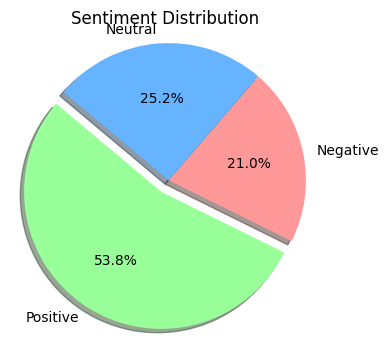

In [18]:
# Data for the pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['#99ff99','#ff9999','#66b3ff']
explode = (0.1, 0, 0)  # explode the 1st slice (i.e. 'Positive')

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()